<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.2%20Redes%20Neuronales%20Profundas/4.2.2%20Regularizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conjunto de Datos

**Diagnósticos de Cáncer de mama (Cuidado de la Salud)**

Enlace al conjunto de datos en UCI Machine Learning:

[Breast Cancer Wisconsin](https://goo.gl/U2Uwz2)

---

### Diccionario de Datos

Las características se calculan a partir de una imagen digitalizada de una aspiración con aguja fina de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.

* perimeter
* area
* symmetry
* radius - Media de las distancias desde el centro hasta los puntos del perímetro
* texture - Desviación estándar de los valores de la escala de grises
* smoothness - Variación local en longitudes de radio
* compactness - `perímetro^2 / área - 1.0`
* concavity - Severidad de las porciones cóncavas del contorno
* concave points - Número de porciones cóncavas del contorno
* fractal dimension - "Coastline approximation" - 1
* benign_0__mal_1 (Variable objetivo)

La media (mean), el error estándar (error) y el peor/mayor (worst) de estas características se calcularon para cada imagen, lo que resultó en 30 variables.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
generation = "MOD4GEN<x>"

In [ ]:
df = pd.read_csv(f'/content/drive/MyDrive/{generation}/4.2 Redes Neuronales Profundas/datasets/cancer/cancer_classification.csv')
df.shape

(569, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Análisis Exploratorio de Datos (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

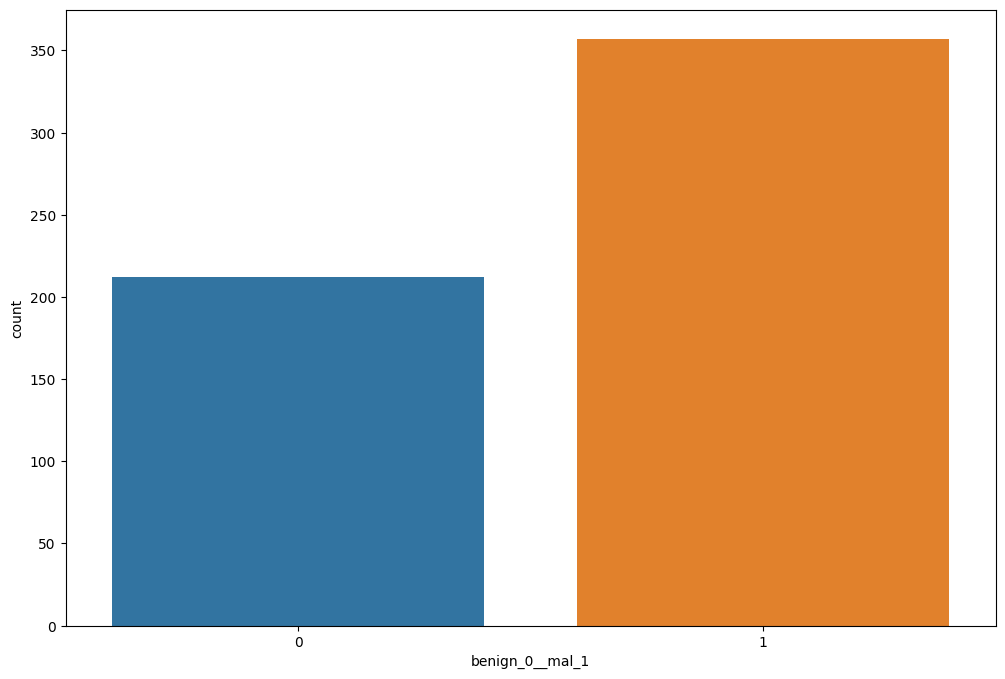

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='benign_0__mal_1');

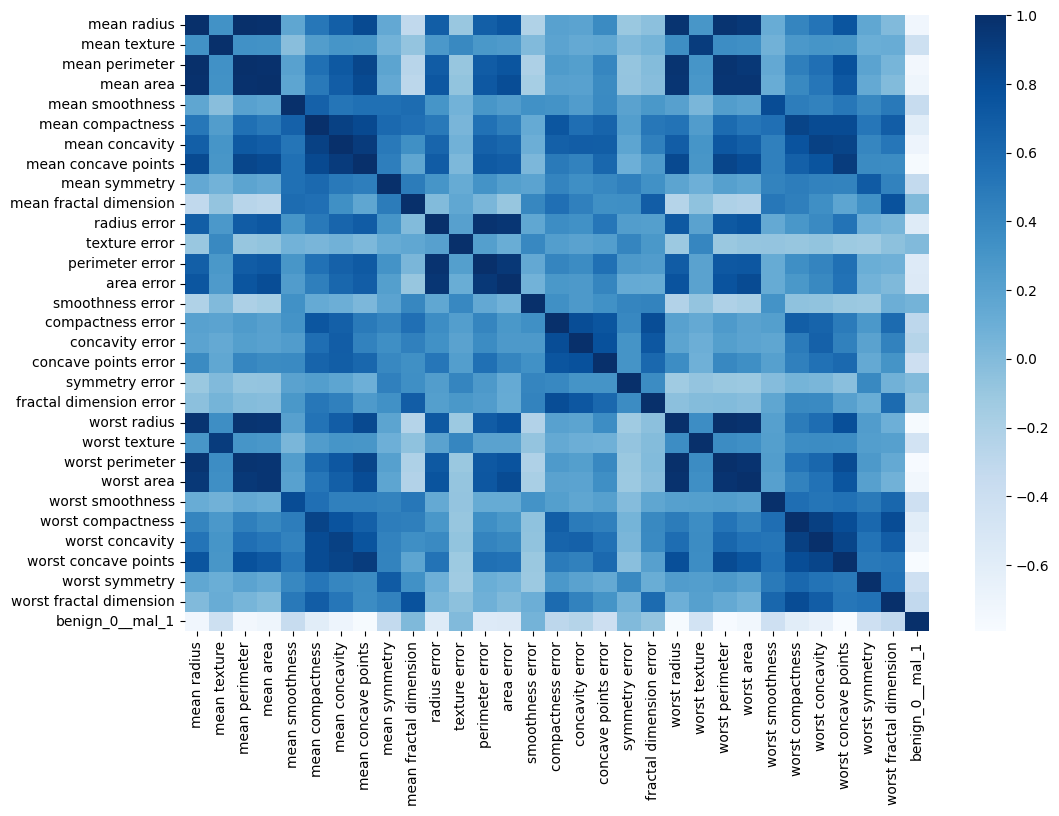

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="Blues");

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

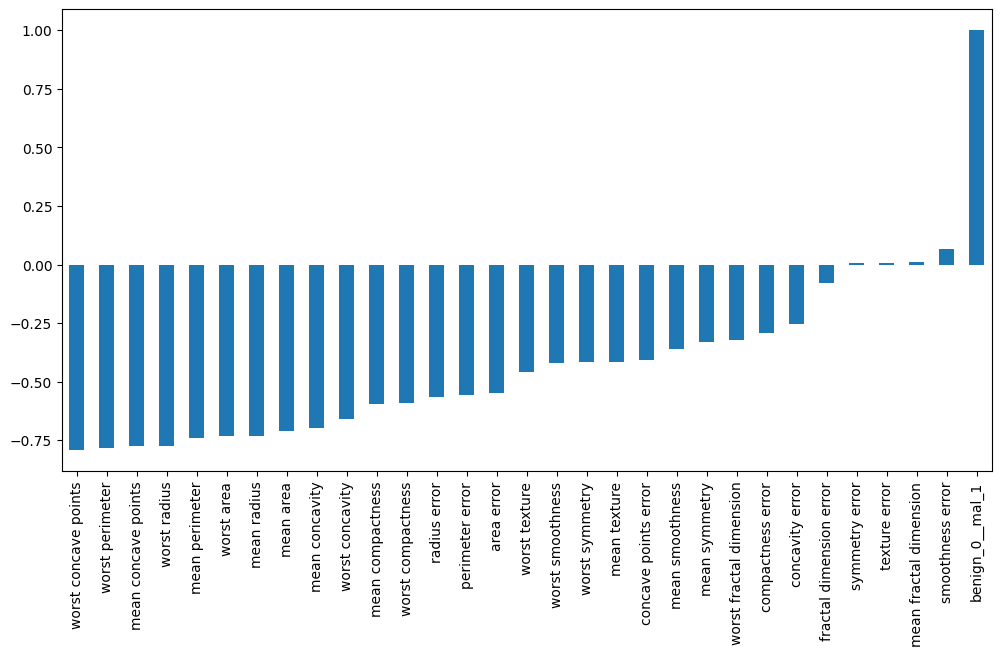

In [ ]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar');

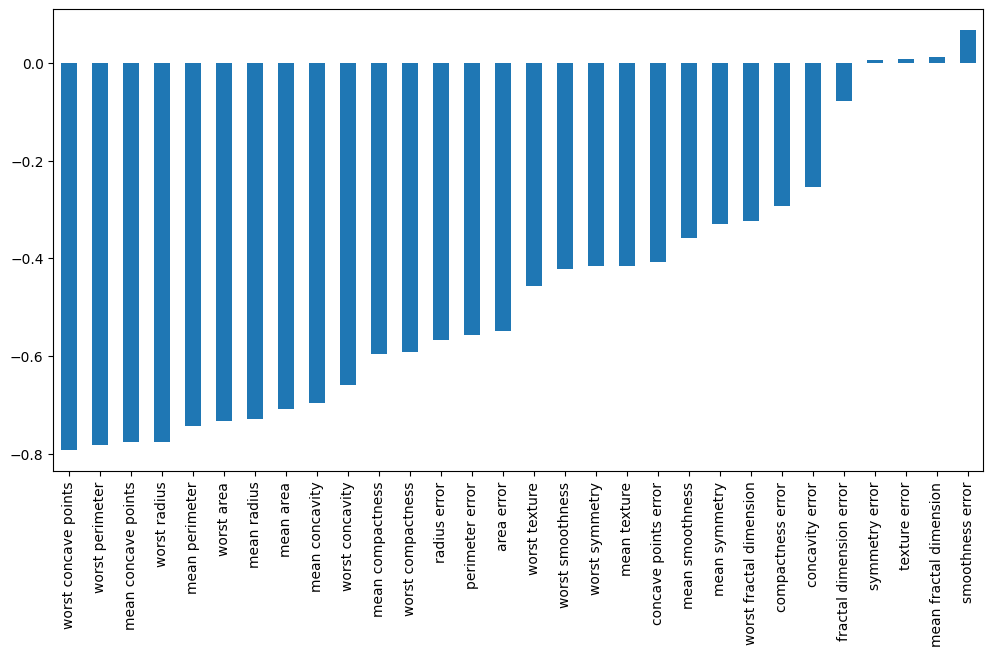

In [ ]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

### Preprocesamiento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
Xs_train = scaler.transform(X_train)
Xs_val = scaler.transform(X_val)

### Entrenamiento

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
Xs_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

### 1. Sobreajuste intencionado

In [ ]:
%%time
model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6718 - val_loss: 0.5518
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5178 - val_loss: 0.4303
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4031 - val_loss: 0.3343
Epoch 4/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3124 - val_loss: 0.2585
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2415 - val_loss: 0.2042
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1907 - val_loss: 0.1687
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1569 - val_loss: 0.1447
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1336 - val_loss: 0.1285
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1181 - val_loss: 0.1165
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1059 - val_loss: 0.1080
Epoch 

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
model_loss.head()

,loss,val_loss
0,0.671787,0.551751
1,0.517829,0.430310
2,0.403078,0.334310
3,0.312371,0.258510
4,0.241467,0.204177


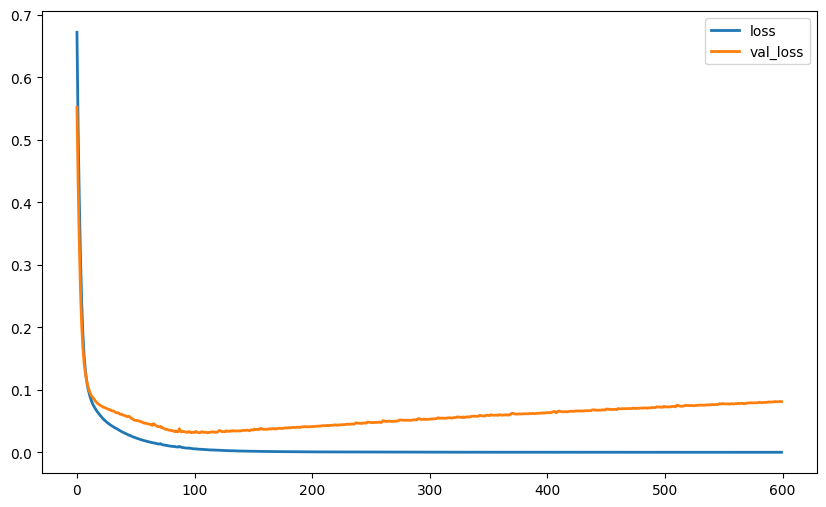

In [ ]:
model_loss.plot(figsize=(10,6), linewidth=2);

### 2. Regularización: Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time
model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6504 - val_loss: 0.5651
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4771 - val_loss: 0.4244
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3603 - val_loss: 0.3182
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.2763 - val_loss: 0.2428
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.2184 - val_loss: 0.1932
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1786 - val_loss: 0.1619
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1531 - val_loss: 0.1386
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.1340 - val_loss: 0.1202
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.1185 - val_loss: 0.1065
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.1065 - val_loss: 0.0964
E

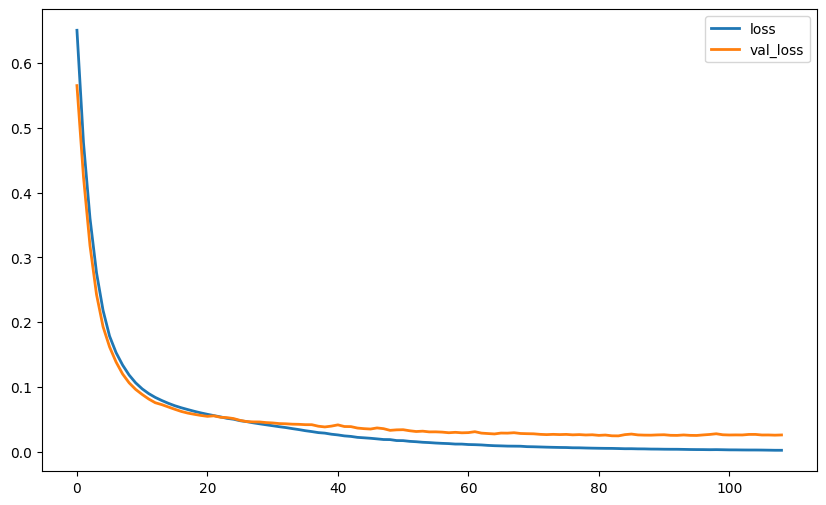

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(10,6), linewidth=2);

### 3. Regularización: Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.35))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
%%time
model.fit(x=Xs_train, y=y_train, epochs=600, validation_data=(Xs_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 15ms/step - loss: 0.7375 - val_loss: 0.5436
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5617 - val_loss: 0.4440
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4840 - val_loss: 0.3713
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4531 - val_loss: 0.3134
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3972 - val_loss: 0.2716
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3487 - val_loss: 0.2357
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3529 - val_loss: 0.2059
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2868 - val_loss: 0.1832
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2649 - val_loss: 0.1638
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2319 - val_loss: 0.1479
Epoch 11

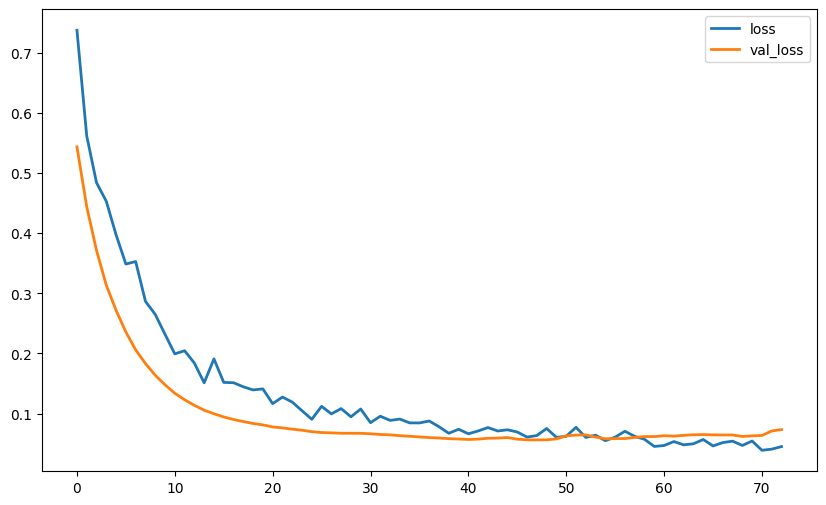

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(figsize=(10,6), linewidth=2);

### Evaluación

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(Xs_val)
classes = np.where(predictions>0.5, 1, 0)
classes = classes.reshape((1, len(predictions)))[0]

5/5 [==============================] - 0s 3ms/step


In [ ]:
pd.value_counts(y_val)

1    88
0    55
dtype: int64

In [ ]:
pd.value_counts(classes)

1    89
0    54
dtype: int64

In [ ]:
print(confusion_matrix(y_val, classes))

[[53  2]
 [ 1 87]]


In [ ]:
print(classification_report(y_val, classes))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.98      0.99      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

